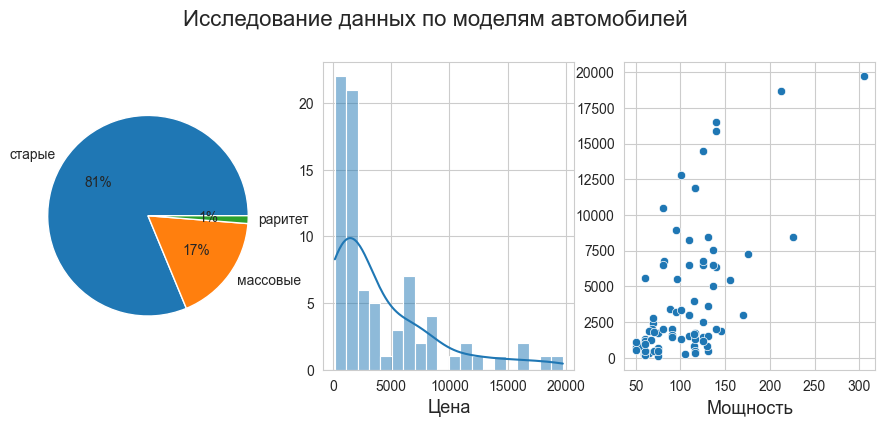

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


def get_label(year):
    if year <= 1980:
        return "раритет"
    elif year <= 2010:
        return "старые"
    elif year <= 2020:
        return "массовые"
    return "современные"


df = pd.read_csv("data5.csv", sep=';')  # sep=','
df.columns = df.columns.str.lower().str.replace(' ', '_')

# brand = input()
brand = "ford"
df = df[(df['brand'] == brand) &
        (df['power'] > 30) &
        (df['price'] > 0)]

df['epoch'] = df["registrationyear"].apply(get_label)

fig, axs = plt.subplots(ncols=3, figsize=(11, 4))  # fig.set_size_inches(9, 4)

# Параметры и оформление картинки с изображением графиков
plt.suptitle('Исследование данных по моделям автомобилей', fontsize=16, y=1.01)
# plt.gcf().subplots_adjust(top=0.85) linespacing=1.01

# Первый график: круговая диаграмма по возрасту автомобиля
plt.subplot(1, 3, 1)
g1 = df['epoch'].value_counts().plot(kind='pie', autopct='%.0f%%')
plt.ylabel(None)

# Второй график: гистограмма цены автомобиля
plt.subplot(1, 3, 2)
g2 = sns.histplot(df['price'], bins=20, kde=True)
plt.xlabel('Цена', fontsize=13)
plt.ylabel(None)

# Третий график: диаграмма рассеяния
plt.subplot(1, 3, 3)
g3 = sns.scatterplot(x='power', y='price', data=df)
plt.xlabel('Мощность', fontsize=13)
plt.ylabel(None)


plt.savefig('target_6_5.png')